In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pygsp import graphs,filters,plotting
%matplotlib inline

In [18]:
G = graphs.Minnesota()
G.coords.shape

(2642, 2)

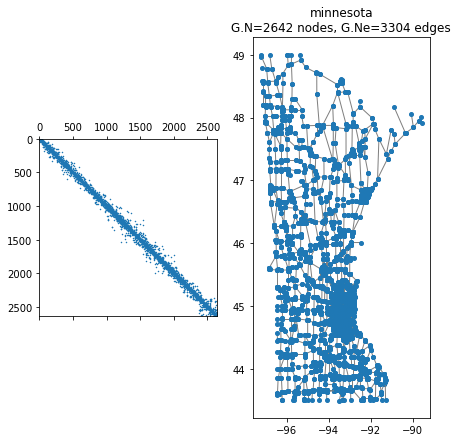

In [10]:
fig,axes = plt.subplots(1,2,figsize=(7,7))
axes[0].spy(G.W,markersize=0.5)
G.plot(ax=axes[1])


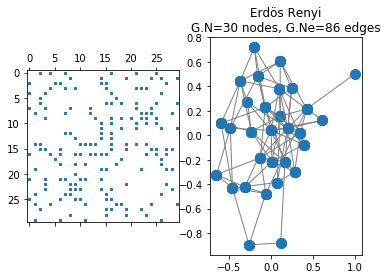

In [21]:
G = graphs.ErdosRenyi(N=30,p=.2)
G.set_coordinates(kind='spring')
fig,ax = plt.subplots(1,2)
ax[0].spy(G.W,markersize=2)
G.plot(ax=ax[1])

#### Graph Laplacian

In [22]:
G.compute_laplacian('combinatorial')

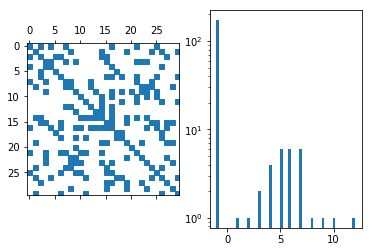

In [23]:
fig,ax = plt.subplots(1,2)
ax[0].spy(G.L,markersize=5);
ax[1].hist(G.L.data,bins=50,log=True);

- L is a scaled version of M as we wrote in the definition and we can see that in the figure since each point is larger
- histogram shows frequency of values within L matrix, -1 dominating due to W

In [45]:
G.compute_laplacian('normalized')

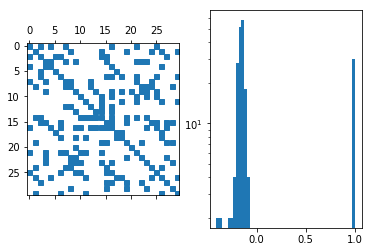

In [46]:
fig,ax = plt.subplots(1,2)
ax[0].spy(G.L,markersize=5);
ax[1].hist(G.L.data,bins=50,log=True);

- L norm values are roughly either 1 or -1 + $\epsilon$

### Graph Signal

laplacian quad form for f =102.07495379875405
laplacian quad form for fsorted =16.003570533445743


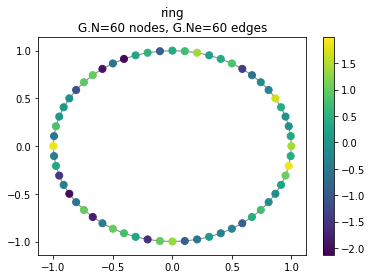

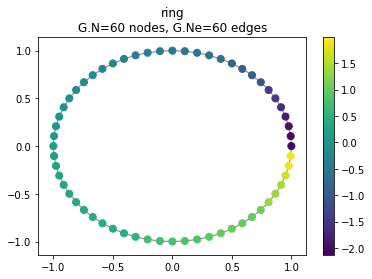

In [90]:
G = graphs.Ring(N=60)
f = np.random.normal(size=G.N)
fsorted = np.sort(f)
G.plot_signal(f,vertex_size=50)
G.plot_signal(fsorted,vertex_size=50)

print('laplacian quad form for f =%s' %f.dot(G.L.toarray()).dot(f))

print('laplacian quad form for fsorted =%s' %fsorted.dot(G.L.toarray()).dot(fsorted))

 - here we have nice symmetry, if we had a web like the twitter feed in class, it becomes unclear what we gain by sorting

### Fourier Basis

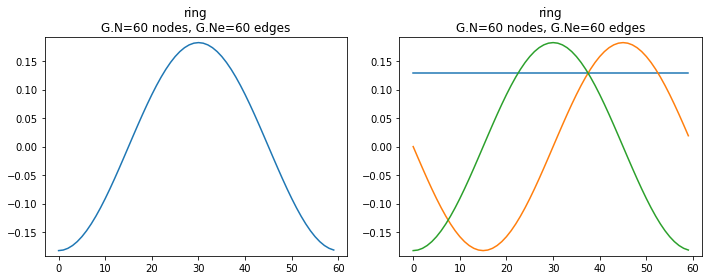

In [93]:
G.compute_fourier_basis()
fig,ax = plt.subplots(1,2,figsize=(10,4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=ax[0]) 
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:3], ax=ax[1]) 
fig.tight_layout()


Looks like the basis is similar to sin functions with different periods and a constant function

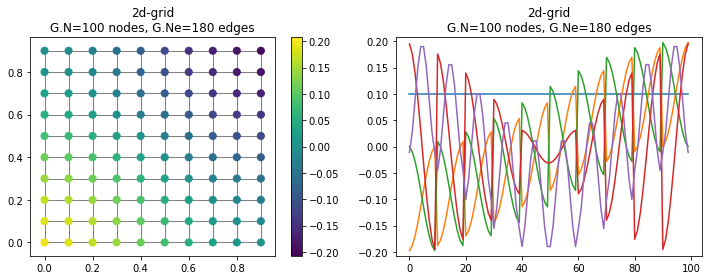

In [95]:
G = graphs.Grid2d(10,10)
#G = graphs.Minnesota()
G.compute_fourier_basis()
fig,ax = plt.subplots(1,2,figsize=(10,4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=ax[0]) 
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:5], ax=ax[1]) 
fig.tight_layout()


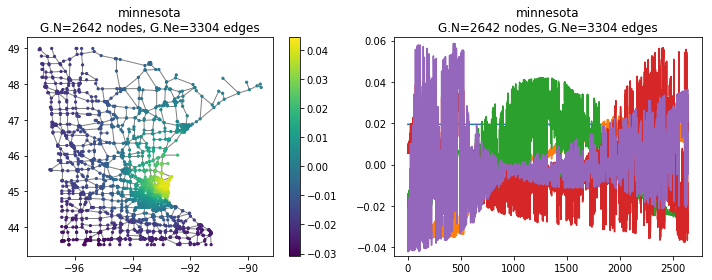

In [97]:
G = graphs.Minnesota()
#G = graphs.Minnesota()
G.compute_fourier_basis()
fig,ax = plt.subplots(1,2,figsize=(10,4))
G.plot_signal(G.U[:, 2], vertex_size=5, ax=ax[0]) 
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 0:5], ax=ax[1],vertex_size=5) 
fig.tight_layout()


- The more complex the system, the more asymmetric the eigenbasis looks


In [100]:

def lapquad(f,G):
    print(f.dot(G.L.toarray()).dot(f))


In [101]:
G = graphs.Grid2d(10,10)
G.compute_fourier_basis()
print('first 5 eigenvector laplacian quadratic form')
for i in range(5):
    lapquad(G.U[:,i],G)

5.551115123137066e-18
0.09788696740969292
0.09788696740969283
0.19577393481938588
0.38196601125010493


In [102]:
G = graphs.Minnesota()
G.compute_fourier_basis()
print('first 5 eigenvector laplacian quadratic form')
for i in range(5):
    lapquad(G.U[:,i],G)

first 5 eigenvector laplacian quadratic form
5.332378100386814e-18
0.0008437341541295256
0.0020758201935044043
0.0022648075983528753
0.0031235829129347545


vectors get less smooth at higher eigenvectors because they are higher frequency

### GFT

2018-10-17 23:42:16,791:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.5900200641113513
INFO:pygsp.graphs.community:Constructed using eps-NN with eps = 2.5900200641113513


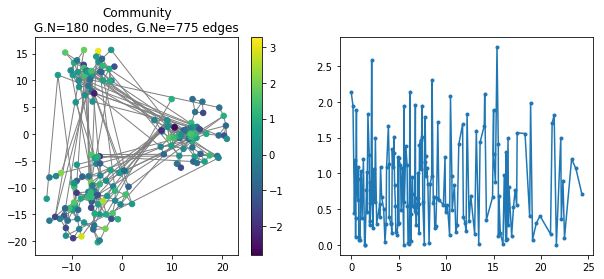

In [104]:
communities = [40, 80, 60]
G = graphs.Community(N=180, Nc=3, comm_sizes=communities)
f = np.random.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), '.-')

many frequency components so its lacking smoothness

In [108]:
fp = np.zeros(G.N)
fp[:communities[0]] = -1 * np.ones(communities[0])
fp[-communities[-1]:] = 1 * np.ones(communities[-1])

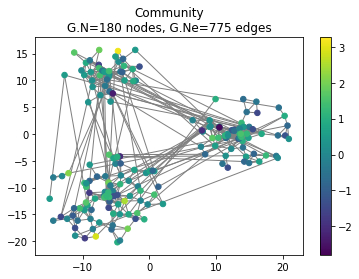

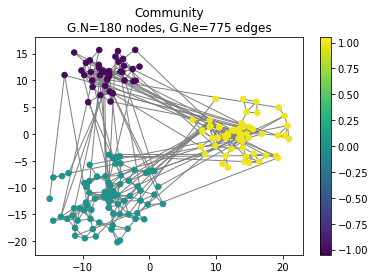

In [110]:
G.plot_signal(f, vertex_size=30)
G.plot_signal(fp, vertex_size=30)

fpart appears smooth

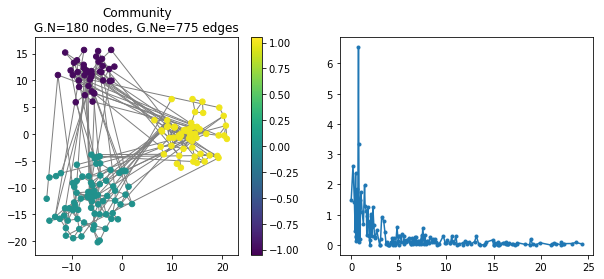

In [112]:
G.compute_fourier_basis()
f_hat = G.gft(fp)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(fp, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), '.-')

we can see that the low frequency components are prominent and higher die out

### Filtering

2018-10-18 09:30:56,967:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.5900200641113513


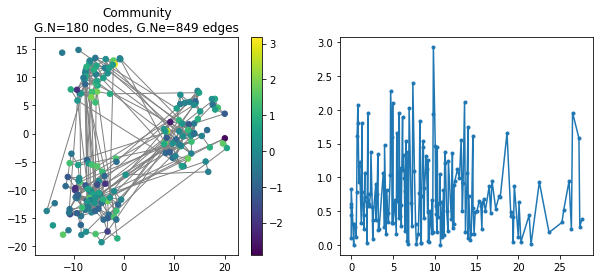

In [3]:
communities = [40, 80, 60]
G = graphs.Community(N=180, Nc=3, comm_sizes=communities)
f = np.random.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), '.-')
import copy
fb_hat = copy.deepcopy(f_hat)
fb_hat[10:] = 0
fb = G.igft(fb_hat)

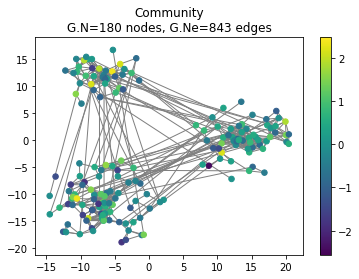

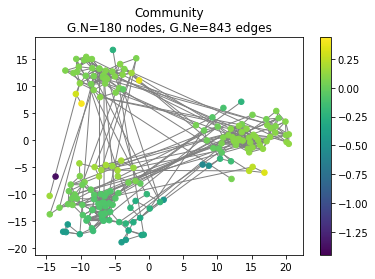

In [3]:
G.plot_signal(f, vertex_size=30)
G.plot_signal(fb, vertex_size=30)

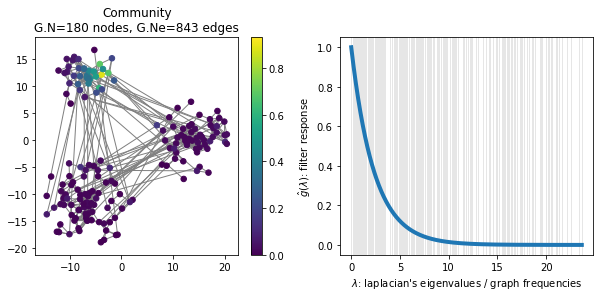

In [5]:
tau = 10
delta = 10
g = filters.Heat(G, tau) #the heat kernel defined via the graph spectral domain
s = g.localize(delta) #the heat kernel localised at a particular node in the vertex domain
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
bbbbg.plot(ax=axes[1])


In [6]:
fh = g.filter(f)

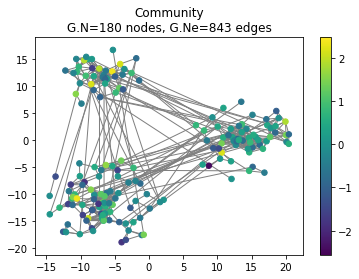

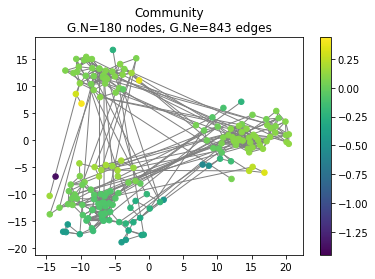

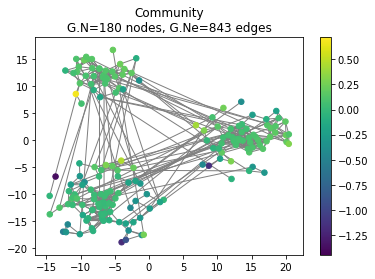

In [8]:
G.plot_signal(f, vertex_size=30)
G.plot_signal(fb, vertex_size=30)
G.plot_signal(fh, vertex_size=30)

### Denoising

$$ min_{x}     || y - x||_2^{2} + \alpha x^T L x $$

$$ || (y-x)^T (y-x) ||_{2} = -2 (y-x) $$

$$ \alpha (L + L^T)x $$

$$ 2(y-x) + \alpha 2 Lx = 0 $$

$$ y = (I + \alpha L)x $$

$$ x = (I+\alpha L)^{-1} y $$

In [10]:
G = graphs.Sensor()

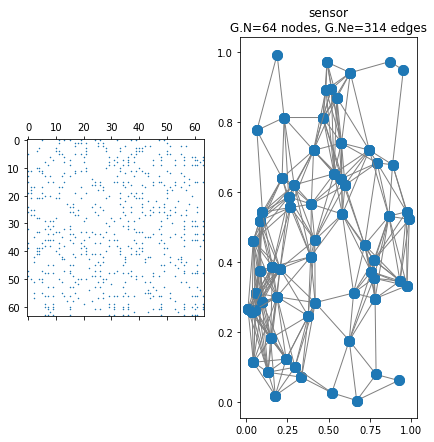

In [13]:
fig,axes = plt.subplots(1,2,figsize=(7,7))
axes[0].spy(G.W,markersize=0.5)
G.plot(ax=axes[1])


In [14]:
L = G.L.toarray()


In [15]:
G.compute_fourier_basis()


In [16]:
fsig = G.U[:,0]*0.5 + G.U[:,1]*0.3 + G.U[:,2]*0.2

In [18]:
fnoise = fsig + np.random.normal(size=len(fsig))

In [21]:
def lowpass(alpha,L,y):
    return np.linalg.inv(np.eye(len(y))+alpha*L).dot(y)

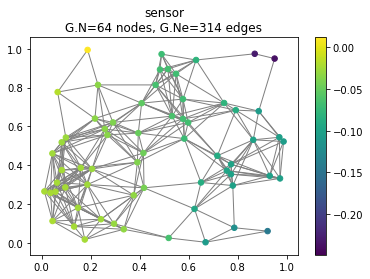

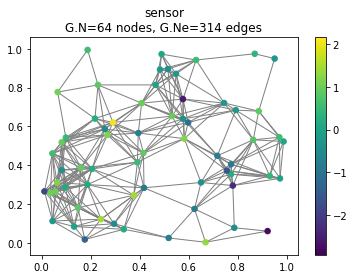

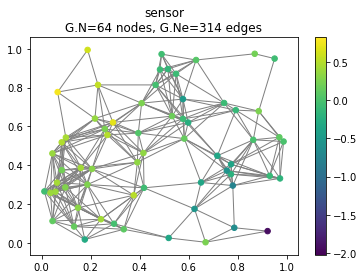

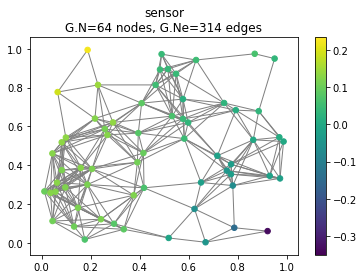

In [23]:
G.plot_signal(fsig, vertex_size=30)
G.plot_signal(fnoise, vertex_size=30)
G.plot_signal(lowpass(0.5,L,fnoise),vertex_size=30)
G.plot_signal(lowpass(10,L,fnoise),vertex_size=30)

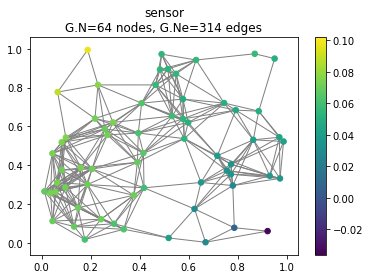

In [29]:
G.plot_signal(lowpass(50,L,fnoise),vertex_size=30)


### Assignment|

$$ min || y - Mx||_2^{2} + \alpha x^T L x $$
$$ -2M^T (y-Mx) + \alpha 2 L x = 0$$
$$  M^T y = M^2 x + \alpha  L x $$

since M^2  = M idempotent

$$  M y = M x + \alpha  L x $$
$$ x = (M + \alpha L)^{-1} M y $$

Basically this is a low pass filter which picks out the observed values, instead of I we have M hence that makes sense

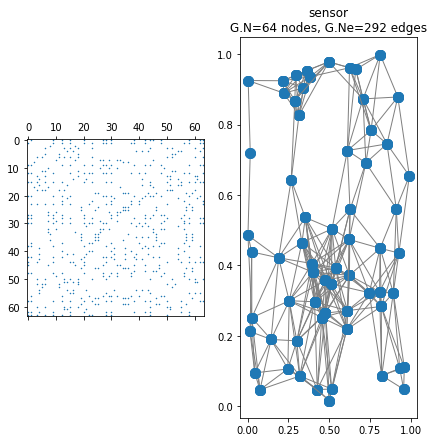

In [75]:
G = graphs.Sensor()
fig,axes = plt.subplots(1,2,figsize=(7,7))
axes[0].spy(G.W,markersize=0.5)
G.plot(ax=axes[1])
L = G.L.toarray()
G.compute_fourier_basis()
fsig = G.U[:,0]*0.5 + G.U[:,1]*0.3 + G.U[:,2]*0.2

In [76]:
fsig = (fsig-np.min(fsig))/(np.max(fsig)-np.min(fsig))

In [26]:
import copy
def subs(fsig,p):
    ftemp = copy.deepcopy(fsig[:])
    mask = np.random.uniform(size=len(fsig)) < p
    ftemp[mask] = 0
    mmat = np.eye(len(ftemp))
    mmat[mask] = 0
    return ftemp,mmat

In [87]:
y,M = subs(fsig,0.5)
alpha = 0.4
xvals = np.linalg.solve(M+alpha*L,M.dot(y))

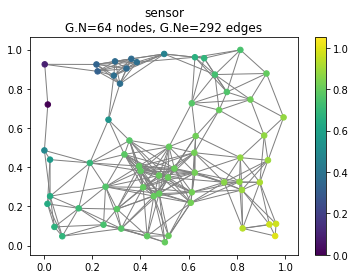

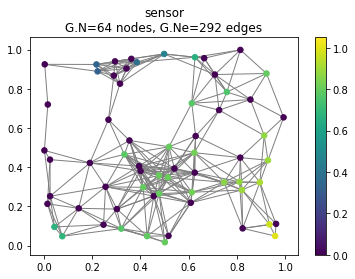

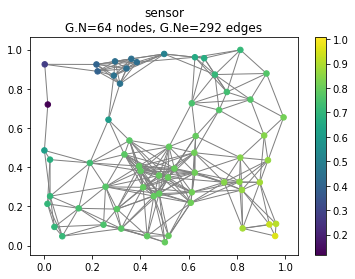

In [89]:
G.plot_signal(fsig, vertex_size=30)
G.plot_signal(y, vertex_size=30)
G.plot_signal(xvals,vertex_size=30)


In [1]:
import imageio
from PIL import Image

In [20]:
orig = imageio.imread('airplane.png')
imageio.imwrite('airplane-gray.jpg', orig[:, :, 0])
size = 64,64
im = Image.open("airplane-gray.jpg")
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("my_image_resized.png", "PNG")
orig = imageio.imread('my_image_resized.png')

In [30]:
G = graphs.Grid2d(64,64)

In [24]:
im = Image.open('my_image_resized.png')

In [31]:
L = G.L.toarray()
fsig = (orig-np.min(orig))/(np.max(orig)-np.min(orig))
y,M = subs(fsig.ravel(),0.5)
alpha = 0.4
xvals = np.linalg.solve(M+alpha*L,M.dot(y))

In [38]:
imageio.imwrite('partial.png',y.reshape(64,64))
imageio.imwrite('inpainted.png',xvals.reshape(64,64))

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\imageio\core\util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
